In [67]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sbn

from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Data

In [80]:
iris = load_iris()
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
train_idx, test_idx = next(iter(skf.split(iris.data, iris.target)))

train_x = iris.data[train_idx]
train_y = iris.target[train_idx]
test_x = iris.data[test_idx]
test_y = iris.target[test_idx]

n_classes = len(np.unique(iris.target))

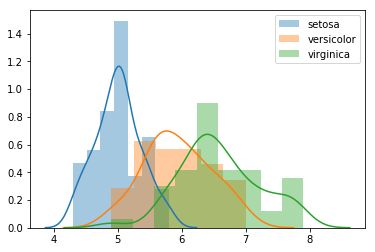

In [88]:
labels = ['setosa', 'versicolor', 'virginica']
for i, label in enumerate(labels):
    sub_data = iris.data[iris.target == i]
    sbn.distplot(sub_data[:, 0], label=label)
    plt.legend()

## Training GMM

In [93]:
    gmm = GaussianMixture(n_classes, covariance_type='tied', max_iter=20, random_state=0)
gmm.means_init = [train_x[train_y == i].mean(axis=0) for i in range(n_classes)]
gmm.fit(train_x)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=20,
        means_init=array([[ 5.0425,  3.445 ,  1.4675,  0.25  ],
       [ 5.895 ,  2.745 ,  4.2325,  1.3125],
       [ 6.5925,  2.9825,  5.4975,  2.0225]]),
        n_components=3, n_init=1, precisions_init=None, random_state=0,
        reg_covar=1e-06, tol=0.001, verbose=0, verbose_interval=10,
        warm_start=False, weights_init=None)

## Evaluation

In [94]:
train_accuracy = np.mean(gmm.predict(train_x) == train_y)
test_accuracy = np.mean(gmm.predict(test_x) == test_y)

print('[Covariance]')
print(gmm.covariances_)
print()

print('train_accuracy:', round(train_accuracy, 2))
print('test_accuracy :', round(test_accuracy, 2))

[Covariance]
[[ 0.22865317  0.07736423  0.1490959   0.03308773]
 [ 0.07736423  0.11258242  0.04137369  0.02472392]
 [ 0.1490959   0.04137369  0.18415626  0.03961295]
 [ 0.03308773  0.02472392  0.03961295  0.03901318]]

train_accuracy: 0.96
test_accuracy : 1.0
